# In this dataset we need to predict whether the crop would be alive, damaged by pesticides or damaged by other reasons.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing warnings
import warnings
warnings.filterwarnings('ignore')

# importing train dataset

In [102]:
df=pd.read_csv('train_agriculture.csv')
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [103]:
df.shape

(4599, 10)

This dataset contains 4599 rows & 10 columns

In [104]:
#checking column names
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [105]:
#checking the information of the column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [106]:
#checking the datatype of various column
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

Observation:-
    
    1.Most of the columns are of int64 type except ID & Numberz-Weeks_Used
    
    2.ID is of object type and  Number-Weeks_Used is of float64 type
    

In [107]:
#checking for null values
df.isnull().values.any()

True

Here we see that null values are present in our dataset

Now we check no. of null values present in particular column

In [108]:
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

Observation:-

1.There are 442 null values present in Number_Weeks_Used column

 We can also see it via visualization with the help of heatmap

In [109]:
#dropping ID column
df.drop('ID',axis=1,inplace=True)

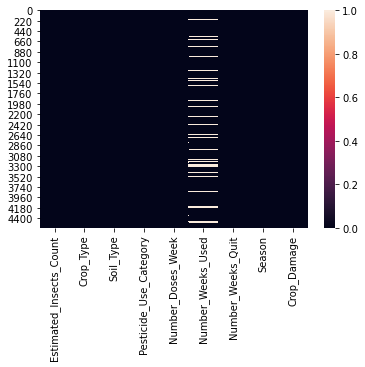

In [110]:
#visualisation

sns.heatmap(df.isnull())

The summary shows that the Number_weeks_used contains missing values

It is of float datatype .So I will impute the missing values with most_freqent

In [111]:
#Imputing the misssing values with most frequent
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='most_frequent')
df['Number_Weeks_Used']=imp.fit_transform(df['Number_Weeks_Used'].values.reshape(-1,1))

In [112]:
#now again checking for missing values

df.isnull().values.any()

False

Now our null values is removed.We can see it via visualisation

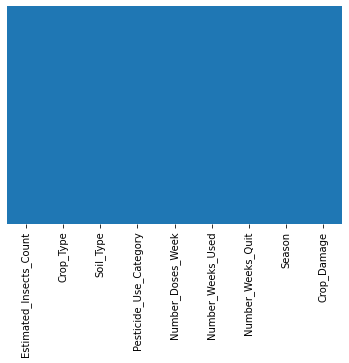

In [113]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20')

# Now our data is ready for visualization without any missing data

In [114]:
df['Crop_Damage'].unique()

array([0, 1, 2], dtype=int64)

# Summary Statistics

In [115]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.036530,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.249436,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,26.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


Observation:

1.there is large difference between 75% & max in estimated_insect_count,which shows outliers are present

2.crop & soil type are of 2 category 0 &1



# check correlation

In [116]:
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.422254,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.001181,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093058,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.357684,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099563,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.422254,-0.001181,-0.093058,0.357684,0.099563,1.000000,-0.429923,-0.012550,0.222360
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.429923,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.012550,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.222360,-0.152918,-0.016196,1.000000


here we see corelation between columns

For better clarity ,we can see it via visualization with the help of heatmap



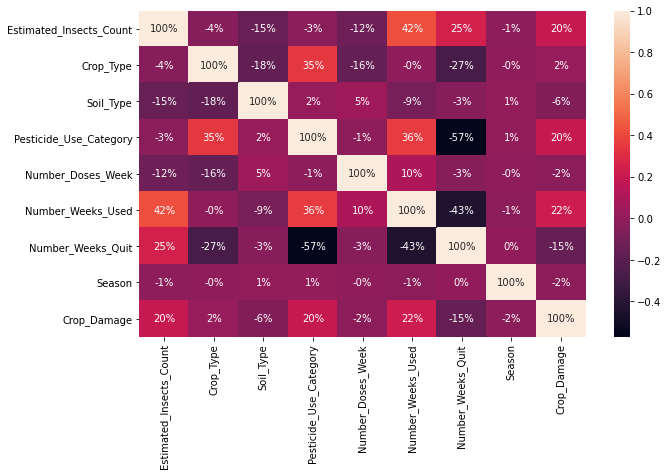

In [117]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),fmt='.0%',annot=True)

Observation:
    
1.number_weeks_used is correlated with estimated_insects_counts

2.pesticides_use category is correlated with crop_type

3.number_weeks_category is negatively correlated withpesticides_used_category

Text(0.5, 1.0, 'correlation with target variable')

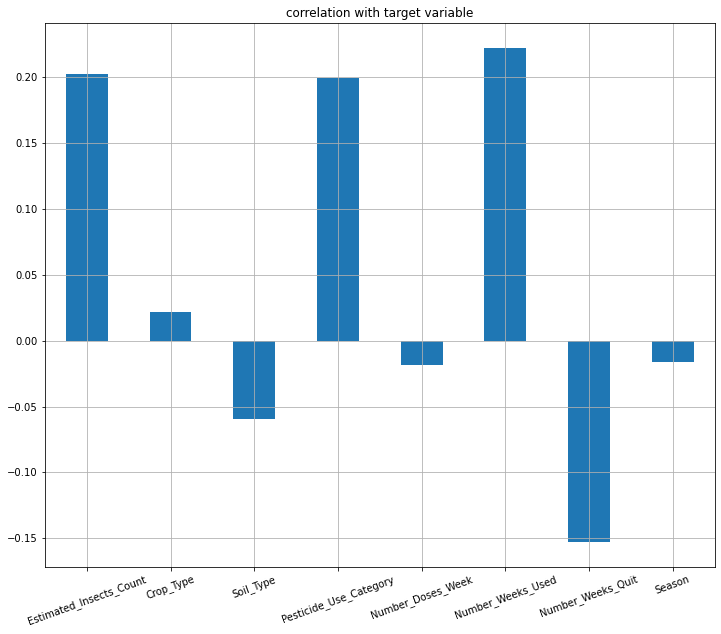

In [118]:
plt.figure(figsize=(12,10))
df.drop('Crop_Damage',axis=1).corrwith(df['Crop_Damage']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('correlation with target variable')

Observation:

1.soil_type,number_doses_week,number_weeks_quit & season is negatively correlated with target variable income

2.number_weeks_used is highly correlated with target variable among all input variables

# Data Visualization

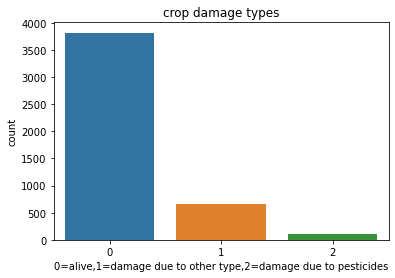

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


In [119]:
#checking count of crop damage category

plt.subplots(figsize=(6,4))
sns.countplot(x='Crop_Damage',data=df)
plt.title('crop damage types')
plt.xlabel('0=alive,1=damage due to other type,2=damage due to pesticides')
plt.ylabel('count')
plt.show()

print(df['Crop_Damage'].value_counts())

In [120]:
df.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

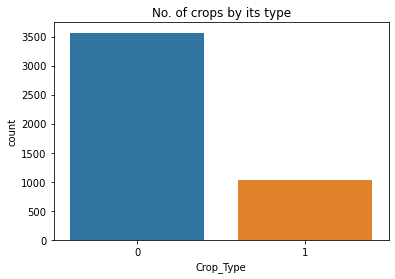

0    3565
1    1034
Name: Crop_Type, dtype: int64


In [121]:
#crop-type

sns.countplot(x='Crop_Type',data=df)
plt.title('No. of crops by its type')
plt.show()

print(df.Crop_Type.value_counts())

Findings:

clearly we see that no. of type 0 crop is 3 times the no. of type 1 crop

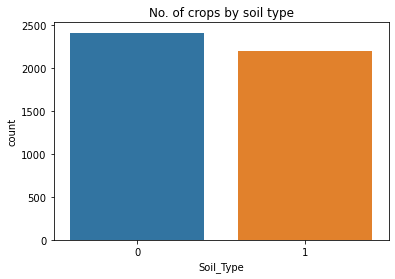

0    2407
1    2192
Name: Soil_Type, dtype: int64


In [122]:
#soil-type

sns.countplot(x='Soil_Type',data=df)
plt.title('No. of crops by soil type')
plt.show()

print(df.Soil_Type.value_counts())

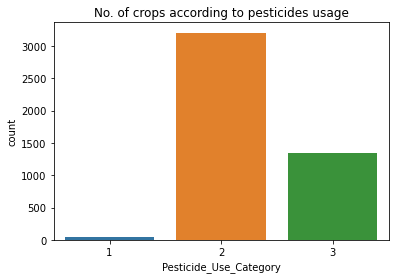

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


In [123]:
#pesticidesuse category-

sns.countplot(x='Pesticide_Use_Category',data=df)
plt.title('No. of crops according to pesticides usage')
plt.show()

print(df.Pesticide_Use_Category.value_counts())

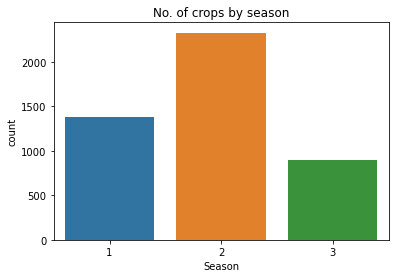

2    2327
1    1379
3     893
Name: Season, dtype: int64


In [124]:
#season

sns.countplot(x='Season',data=df)
plt.title('No. of crops by season')
plt.show()

print(df.Season.value_counts())

Findings:
    
    most no. of crops are grown in season 2

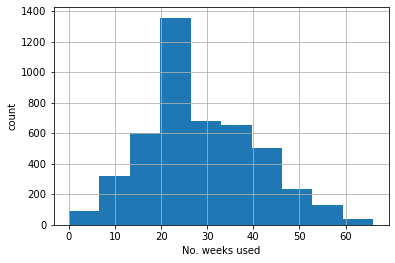

In [125]:
#checking no. of hours per week

df['Number_Weeks_Used'].hist()
plt.xlabel('No. weeks used')
plt.ylabel('count')
plt.show()

findings:
    
    approx 1100 crops require 25-35 week

In [126]:
df.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

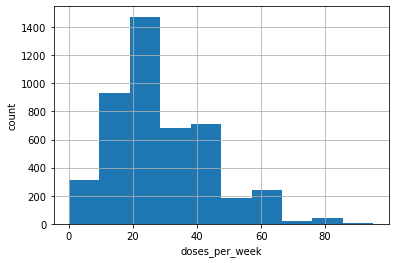

In [127]:
#checking no.of doses per week

df['Number_Doses_Week'].hist()
plt.xlabel('doses_per_week')
plt.ylabel('count')
plt.show()



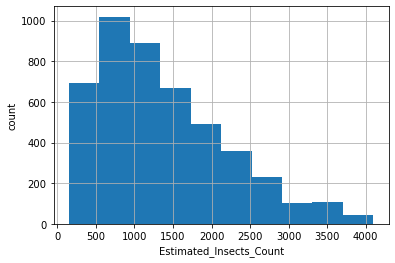

In [128]:
#checking Estimated_Insects_Count

df['Estimated_Insects_Count'].hist()
plt.xlabel('Estimated_Insects_Count')
plt.ylabel('count')
plt.show()



findings:
    
    maximum estimated insects counts lie between 500-100

# Bivariate Analysis

# soil type vs crop daamge

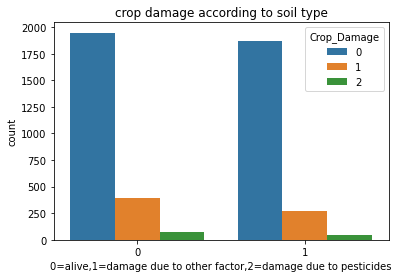

Soil_Type  Crop_Damage
0          0              1947
           1               390
           2                70
1          0              1873
           1               274
           2                45
Name: Crop_Damage, dtype: int64


In [129]:

sns.countplot(x='Soil_Type',hue='Crop_Damage',data=df)
plt.title('crop damage according to soil type')
plt.xlabel('0=alive,1=damage due to other factor,2=damage due to pesticides')
plt.ylabel('count')
plt.show()

print(df.groupby('Soil_Type')['Crop_Damage'].value_counts())

Observation:
    
    In both soil type very few crops are damaged due tp pesticides

# season vs crop damage

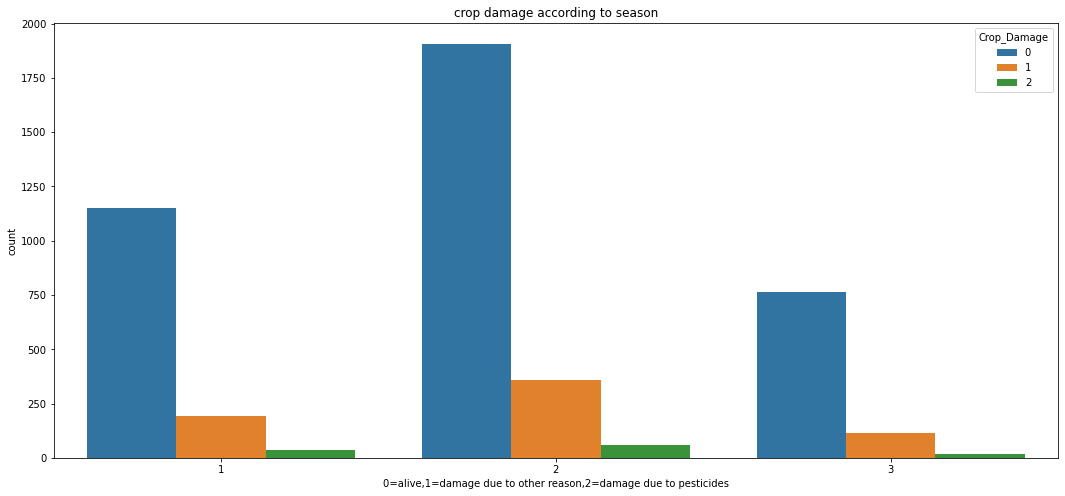

Season  Crop_Damage
1       0              1150
        1               192
        2                37
2       0              1908
        1               358
        2                61
3       0               762
        1               114
        2                17
Name: Crop_Damage, dtype: int64


In [130]:
plt.subplots(figsize=(18,8))
sns.countplot(x='Season',hue='Crop_Damage',data=df)
plt.title('crop damage according to season')
plt.xlabel('0=alive,1=damage due to other reason,2=damage due to pesticides')
plt.ylabel('count')
plt.show()

print(df.groupby('Season')['Crop_Damage'].value_counts())

# crop type vs crop damage

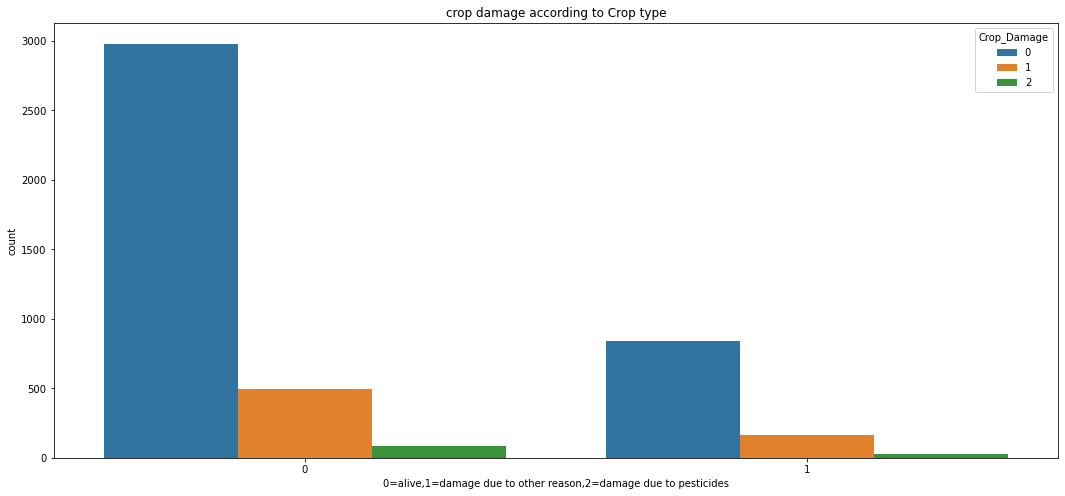

Crop_Type  Crop_Damage
0          0              2979
           1               498
           2                88
1          0               841
           1               166
           2                27
Name: Crop_Damage, dtype: int64


In [131]:
plt.subplots(figsize=(18,8))
sns.countplot(x='Crop_Type',hue='Crop_Damage',data=df)
plt.title('crop damage according to Crop type')
plt.xlabel('0=alive,1=damage due to other reason,2=damage due to pesticides')
plt.ylabel('count')
plt.show()

print(df.groupby('Crop_Type')['Crop_Damage'].value_counts())

# pesticides use category vs crop damage

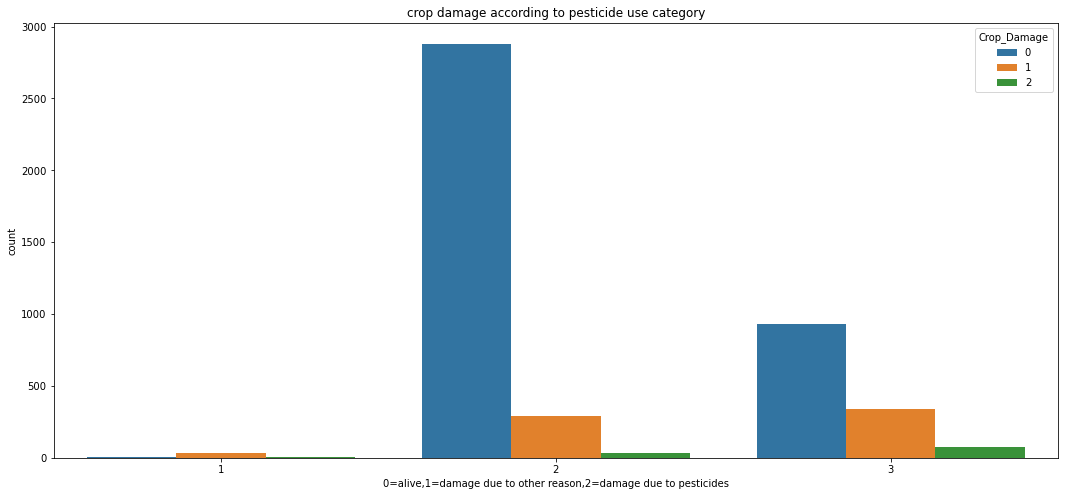

Pesticide_Use_Category  Crop_Damage
1                       1                33
                        0                 7
                        2                 5
2                       0              2881
                        1               290
                        2                34
3                       0               932
                        1               341
                        2                76
Name: Crop_Damage, dtype: int64


In [132]:
plt.subplots(figsize=(18,8))
sns.countplot(x='Pesticide_Use_Category',hue='Crop_Damage',data=df)
plt.title('crop damage according to pesticide use category')
plt.xlabel('0=alive,1=damage due to other reason,2=damage due to pesticides')
plt.ylabel('count')
plt.show()

print(df.groupby('Pesticide_Use_Category')['Crop_Damage'].value_counts())

In [133]:
df['Crop_Damage'].unique()

array([0, 1, 2], dtype=int64)

# checking skewness

In [134]:
df.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.432681
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

Estimated_Insects_Count        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Crop_Type                   AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Soil_Type                   AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Pesticide_Use_Category      AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Number_Doses_Week             AxesSubplot(0.125,0.518913;0.168478x0.16413)
Number_Weeks_Used          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Number_Weeks_Quit          AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Season                     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Crop_Damage                   AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

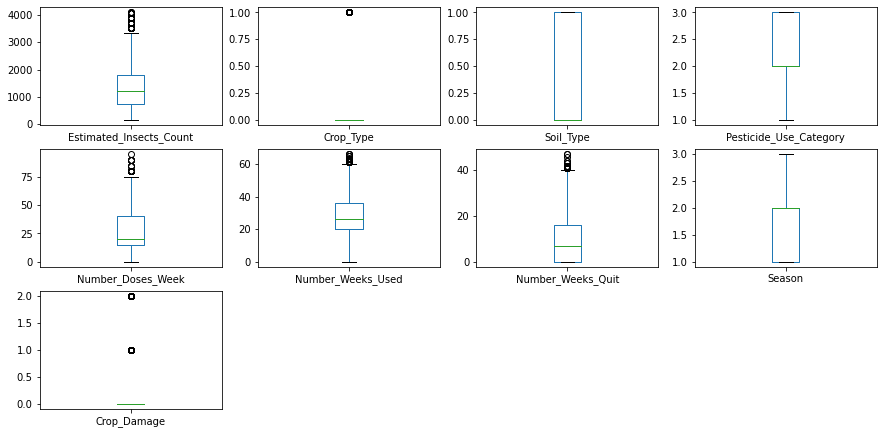

In [135]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,10))

we see that ,some outliers are present in our dataset,which needs to be removed

# removing outliers

Removing outliers from continuous features

In [136]:
from scipy.stats import zscore
z = np.abs(zscore(df[["Estimated_Insects_Count","Number_Doses_Week","Number_Weeks_Used","Number_Weeks_Quit"]]))

df_new = df[(z<3).all(axis=1)]
df_new.shape

(4482, 9)

outliers have been removed

# model training

In [137]:
#spliting the data into input and output variable
x=df_new.drop('Crop_Damage',axis=1)
x.shape

(4482, 8)

In [138]:
y=df_new['Crop_Damage']
y.value_counts()

0    3731
1     639
2     112
Name: Crop_Damage, dtype: int64

In [139]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [140]:
#splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [141]:
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shapea:',y_train.shape)
print('y_test_shape:',y_test.shape)

x_train_shape: (3585, 8)
x_test_shape: (897, 8)
y_train_shapea: (3585,)
y_test_shape: (897,)


In [142]:
#importing all the models library

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#importring error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import GridSearchCV,cross_val_score

# Finding the best parameters

In [143]:
#using GridsearchCV to find the best parmeter in  KNeighborsClassifier
parameters={'n_neighbors':range(22,30)}
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x,y)

print(clf.best_params_)

{'n_neighbors': 29}


In [144]:
#using GridsearchCV to find the best parmeter in  DecisionTreeClassifier

parameters={'criterion':['gini','entropy'],'random_state':range(42,100)}
dtc=DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)

print(clf.best_params_)

{'criterion': 'entropy', 'random_state': 81}


In [145]:
#gridsearchcv for svc
parameters={'kernel':['linear','rbf'],'C':[1,10],'random_state':range(35,100)}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)


print(clf.best_params_)

{'C': 1, 'kernel': 'rbf', 'random_state': 35}


In [146]:
#models with is best parameters

knn=KNeighborsClassifier(n_neighbors=29)
svc=SVC(kernel='rbf',C=1,random_state=35)
dtc=DecisionTreeClassifier(criterion='entropy',random_state=81)



In [147]:
#all Algorithm by using for loop
model=[knn,svc,dtc]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is:',accuracy_score(y_test,predm))
    print('\n')
    print(confusion_matrix(y_test,predm))
    print('\n')
    print(classification_report(y_test,predm))
    print('*************************************************************************************')
    print('\n')

Accuracy score of  KNeighborsClassifier(n_neighbors=29) is: 0.8372352285395763


[[741   6   0]
 [118  10   0]
 [ 19   3   0]]


              precision    recall  f1-score   support

           0       0.84      0.99      0.91       747
           1       0.53      0.08      0.14       128
           2       0.00      0.00      0.00        22

    accuracy                           0.84       897
   macro avg       0.46      0.36      0.35       897
weighted avg       0.78      0.84      0.78       897

*************************************************************************************


Accuracy score of  SVC(C=1, random_state=35) is: 0.8405797101449275


[[745   2   0]
 [119   9   0]
 [ 22   0   0]]


              precision    recall  f1-score   support

           0       0.84      1.00      0.91       747
           1       0.82      0.07      0.13       128
           2       0.00      0.00      0.00        22

    accuracy                           0.84       897
   macro avg

In [148]:
#cross validate the models
models=[knn,svc,dtc]
for m in models:
    score=cross_val_score(m,x,y,cv=5,scoring='accuracy')
    print('Model:',m)
    print('\n')
    print('score:',score)
    print('mean_score:',score.mean())
    print('standard deviation:',score.std())
    print('*****************************************************************************************')
    print('\n')

Model: KNeighborsClassifier(n_neighbors=29)


score: [0.80602007 0.83166109 0.82589286 0.82924107 0.83258929]
mean_score: 0.8250808747412008
standard deviation: 0.009807715833465595
*****************************************************************************************


Model: SVC(C=1, random_state=35)


score: [0.82943144 0.83166109 0.83928571 0.83258929 0.83258929]
mean_score: 0.8331113632744067
standard deviation: 0.003295842068073791
*****************************************************************************************


Model: DecisionTreeClassifier(criterion='entropy', random_state=81)


score: [0.67001115 0.75473802 0.74107143 0.69419643 0.7578125 ]
mean_score: 0.7235659042044912
standard deviation: 0.03516148807492903
*****************************************************************************************




observation:
    
from above all models SVC is giving best accracy score

now we will use some boosting technique to boostup our score

# Using ensemble technique to boost up our score

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [150]:
#All algorithm by using for loop
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*****************************************************************************')
    print('\n')

Accuracy score of  RandomForestClassifier() is:
0.8327759197324415
[[720  27   0]
 [ 98  27   3]
 [ 16   6   0]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       747
           1       0.45      0.21      0.29       128
           2       0.00      0.00      0.00        22

    accuracy                           0.83       897
   macro avg       0.44      0.39      0.40       897
weighted avg       0.78      0.83      0.80       897

*****************************************************************************


Accuracy score of  AdaBoostClassifier() is:
0.8338907469342252
[[737  10   0]
 [117  11   0]
 [ 20   2   0]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       747
           1       0.48      0.09      0.15       128
           2       0.00      0.00      0.00        22

    accuracy                           0.83       897
   macro avg       0.44      0.36      0.35  

In [151]:
#cross validate the boostingmodels
models=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
for m in models:
    score=cross_val_score(m,x,y,cv=5,scoring='accuracy')
    print('Model:',m)
    print('\n')
    print('score:',score)
    print('mean_score:',score.mean())
    print('standard deviation:',score.std())
    print('*****************************************************************************************')
    print('\n')

Model: RandomForestClassifier()


score: [0.79598662 0.82274247 0.8203125  0.80133929 0.82254464]
mean_score: 0.812585105112279
standard deviation: 0.011524367907159825
*****************************************************************************************


Model: AdaBoostClassifier()


score: [0.80267559 0.82943144 0.84263393 0.83370536 0.83370536]
mean_score: 0.8284303332537029
standard deviation: 0.013577209786609163
*****************************************************************************************


Model: GradientBoostingClassifier()


score: [0.81493868 0.82274247 0.84151786 0.82700893 0.82366071]
mean_score: 0.825973731884058
standard deviation: 0.008720720210239886
*****************************************************************************************




In [152]:
#gridsearchcv for svc
parameters={'algorithm' :['SAMME'],'random_state':range(42,100),'n_estimators':[50,100]}
ad=AdaBoostClassifier()
clf=GridSearchCV(ad,parameters)
clf.fit(x,y)


print(clf.best_params_)

{'algorithm': 'SAMME', 'n_estimators': 100, 'random_state': 42}


In [153]:
#Adaboostclassifier with best result

ad=AdaBoostClassifier(n_estimators=100,base_estimator=svc,algorithm='SAMME',random_state=42)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8327759197324415
[[747   0   0]
 [128   0   0]
 [ 22   0   0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       747
           1       0.00      0.00      0.00       128
           2       0.00      0.00      0.00        22

    accuracy                           0.83       897
   macro avg       0.28      0.33      0.30       897
weighted avg       0.69      0.83      0.76       897



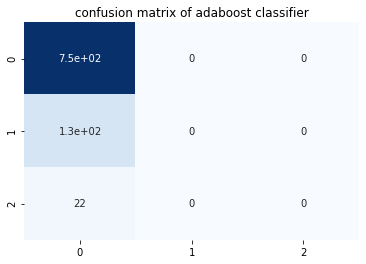

In [154]:
#plotting confusion matrix for adaboostclassifier
cm=confusion_matrix(y_test,ad_pred)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')

plt.title('confusion matrix of adaboost classifier')
plt.show()

In [155]:
#saving best model
import joblib
joblib.dump(ad,'Crop_Damage_Prediction.pkl')

['Crop_Damage_Prediction.pkl']

# loading Test dataset

In [195]:
df1=pd.read_csv('test_agriculture.csv')
df1.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


Now we will  preprocess the test data as we processed the train dataset

In [196]:
df1.shape

(1199, 9)

test dataset contain 1199 rows & 9 column

In [197]:
#checking column name

df1.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [198]:
#checking datatype
df1.columns.groupby(df.dtypes)

{dtype('int64'): Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
        'Pesticide_Use_Category', 'Number_Weeks_Used', 'Number_Weeks_Quit',
        'Season'],
       dtype='object'),
 dtype('float64'): Index(['Number_Doses_Week'], dtype='object')}

In [199]:
#checking for null values in test dataset in each colmn
df1.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

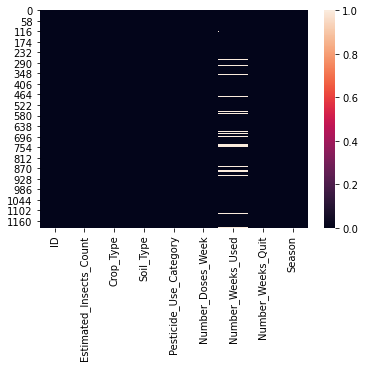

In [200]:
#visualization
sns.heatmap(df1.isnull())

In [201]:
df1.dropna(inplace=True)
df1.shape

(1080, 9)

In [202]:
#dropping ID column
df1.drop('ID',axis=1)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1
5,851,0,1,1,0,0.0,0,2
...,...,...,...,...,...,...,...,...
1192,1132,0,1,2,60,14.0,23,2
1194,1132,0,1,2,40,34.0,7,3
1195,1132,0,1,2,40,25.0,3,1
1196,1132,0,1,2,20,13.0,23,1


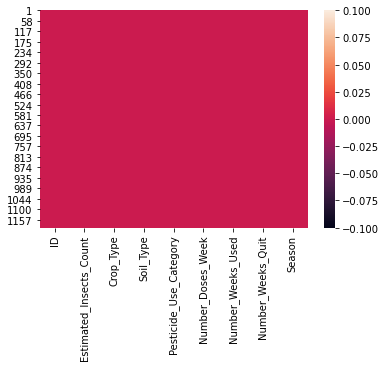

In [203]:
#now again checking for missing values via visualization
sns.heatmap(df1.isnull())


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4599 non-null   int64  
 1   Crop_Type                4599 non-null   int64  
 2   Soil_Type                4599 non-null   int64  
 3   Pesticide_Use_Category   4599 non-null   int64  
 4   Number_Doses_Week        4599 non-null   int64  
 5   Number_Weeks_Used        4599 non-null   float64
 6   Number_Weeks_Quit        4599 non-null   int64  
 7   Season                   4599 non-null   int64  
 8   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 323.5 KB


In [205]:
df1.drop(['ID'],axis=1,inplace=True)

In [206]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 1 to 1197
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  1080 non-null   int64  
 1   Crop_Type                1080 non-null   int64  
 2   Soil_Type                1080 non-null   int64  
 3   Pesticide_Use_Category   1080 non-null   int64  
 4   Number_Doses_Week        1080 non-null   int64  
 5   Number_Weeks_Used        1080 non-null   float64
 6   Number_Weeks_Quit        1080 non-null   int64  
 7   Season                   1080 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 75.9 KB


The columns in the test dataset(.ie df1) match with the train dataset(.ie df) and is ready for prediction of Crop Damage

In [207]:
model = joblib.load("Crop_Damage_Prediction.pkl")
crop_damage = model.predict(df1)
print(crop_damage)


[0 0 0 ... 0 0 0]


In [190]:
np.savetxt("crop_damage_prediction.csv", crop_damage, delimiter=",")